2D

https://pypi.org/project/fdtd/

https://fdtd.readthedocs.io/en/latest/index.html

In [1]:
import fdtd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Si se da la tupla en floats, se tomarán esos valores en metros
grid = fdtd.Grid(
    shape = (25e-6, 15e-6, 1), # 25um x 15um x 1  Dando el último valor como uno se crea una grid de dos dimensiones
)

print(grid)

Grid(shape=(161,97,1), grid_spacing=1.55e-07, courant_number=0.70)



Suponiendo que el aire no es magnético en las condiciones a trabajar, se puede tomar $\mu_r \approx 1$ y por lo tanto:

$$
n = \sqrt{\epsilon_r \mu_r} \approx \sqrt{\epsilon_r}
$$

Inicialmente y por sencillez, se modelará el índice de refracción como un campo aleatório. Variando la presión en un rango 

In [3]:
# Valor promedio
n1 = 1.000276
epsilon1 = n1**2
print(epsilon1)
# n + sigma
n2 = 1.000376
epsilon2 = n2**2
print("Nueva sigma: ", epsilon1 - epsilon2)

1.0005520761759998
Nueva sigma:  -0.00020006520000004357


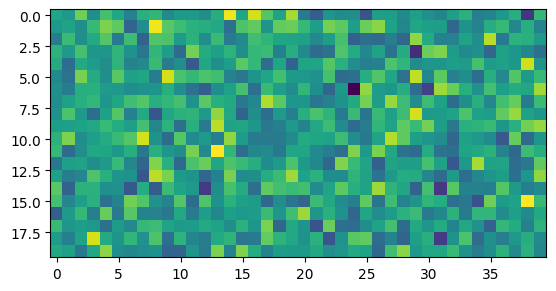

In [4]:
patch = np.random.normal(epsilon1, 0.0002, (20, 40, 1))

grid[10+50:30+50, 30:70, 0] = fdtd.Object(permittivity=patch, name="Aire turbulento")

plt.imshow(patch)
plt.show()

In [5]:
# Añadimos una fuente con perfil gaussiano
grid[145, 40:60, 0] = fdtd.LineSource(
    period = 600e-9 / (3e8), name="Fuente"
)

In [6]:
# Añadimos un detector
grid[10, :, 0] = fdtd.LineDetector(name="detector")
print(grid.detector)

    LineDetector(name='detector')
        @ x=[10, ... , 10], y=[0, ... , 96], z=[0, ... , 0]



In [7]:
# Añadimos condiciones de contorno: perfectly matched layer al rededor de todo la grid
#fdtd.boundaries.DomainBorderPML(grid, border_cells=1)
# x boundaries
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

# y boundaries
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")

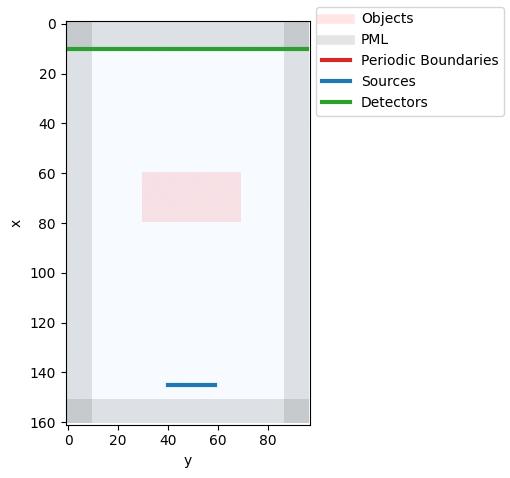

In [8]:
grid.visualize(z=0) # Para visualizarlo mejor https://fdtd.readthedocs.io/en/latest/examples/01-basic-example.html#Visualization

In [9]:
# Resumen de la grid
print(grid)

Grid(shape=(161,97,1), grid_spacing=1.55e-07, courant_number=0.70)

sources:
    LineSource(period=6, amplitude=1.0, phase_shift=0.0, name='Fuente')
        @ x=[145, ... , 145], y=[40, ... , 59], z=[0, ... , 0]

detectors:
    LineDetector(name='detector')
        @ x=[10, ... , 10], y=[0, ... , 96], z=[0, ... , 0]

boundaries:
    PML(name='pml_xlow')
        @ x=0:10, y=:, z=:
    PML(name='pml_xhigh')
        @ x=-10:, y=:, z=:
    PML(name='pml_ylow')
        @ x=:, y=0:10, z=:
    PML(name='pml_yhigh')
        @ x=:, y=-10:, z=:

objects:
    Object(name='Aire turbulento')
        @ x=60:80, y=30:70, z=0:1



100%|██████████| 10/10 [00:00<00:00, 451.75it/s]


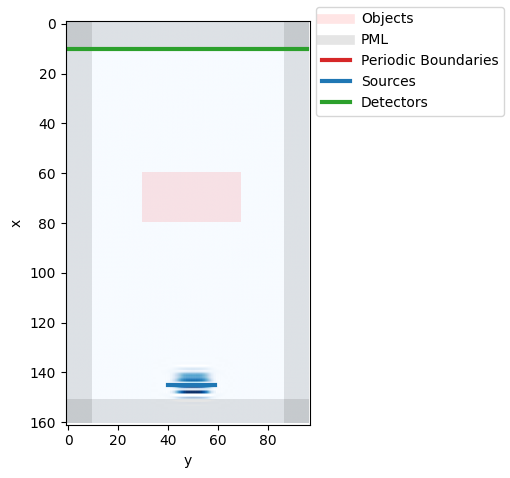

In [10]:
grid.run(total_time=10) # int para número de pasos, float para segundos
grid.visualize(z=0)

Cambiando parámetros y generalizando

1.0005520761759998 1.000553709825617


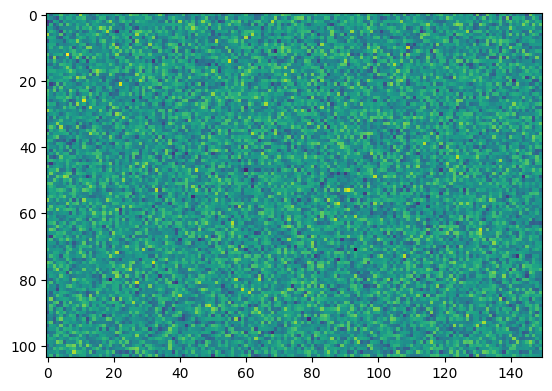

In [ ]:
# Todo en una celda
longitud_onda = 780e-9 # metros -> el spacing debe ser 10 veces menor que la longitud de onda para tener estabilidad

grid = fdtd.Grid(
    shape = (25e-6, 15e-6, 1), # 25um x 15um x 1  Dando el último valor como uno se crea una grid de dos dimensiones
    grid_spacing=longitud_onda/10
)

n1 = 1.000276
epsilon1 = n1**2

# Tamaño en x: 1/4 del dominio
tamaño_x = grid.shape[0]//4
# Tamaño en y: 3/5 del dominio
tamaño_y = grid.shape[1]*3//5
patch = np.random.normal(epsilon1, 0.0004, (tamaño_x, tamaño_y, 1))
print(epsilon1, np.mean(patch))

# 
offset_x = grid.shape[0]//4
offset_y = grid.shape[1]//5
grid[offset_x:offset_x+tamaño_x, offset_y:offset_y+tamaño_y, 0] = fdtd.Object(permittivity=patch, name="Aire turbulento")

plt.imshow(patch)
plt.show()

# Añadimos una fuente con perfil gaussiano
tamaño_y = grid.shape[1]*2//4
offset_y = grid.shape[1]//4

grid[grid.shape[0]-20, offset_y:offset_y+tamaño_y, 0] = fdtd.LineSource(
    period = longitud_onda / (3e8), name="Fuente"
) # 20:80
# Añadimos un detector
grid[10, :, 0] = fdtd.LineDetector(name="detector")

# x boundaries
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

# y boundaries
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")
#grid.visualize(z=0)

100%|██████████| 600/600 [00:06<00:00, 90.11it/s]


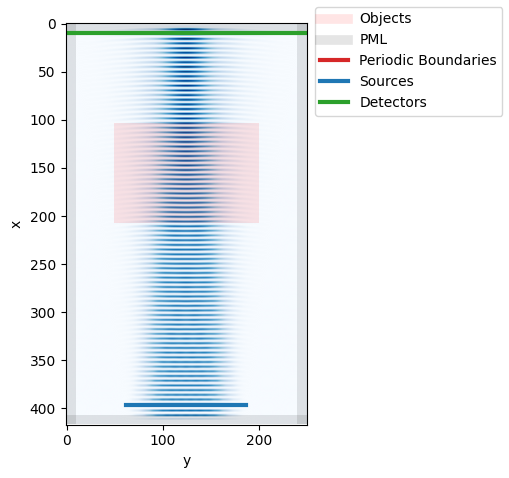

In [13]:
grid.run(total_time=600) # int para número de pasos, float para segundos
grid.visualize(z=0)

  0%|          | 0/600 [00:00<?, ?it/s]

100%|██████████| 600/600 [00:06<00:00, 94.83it/s] 


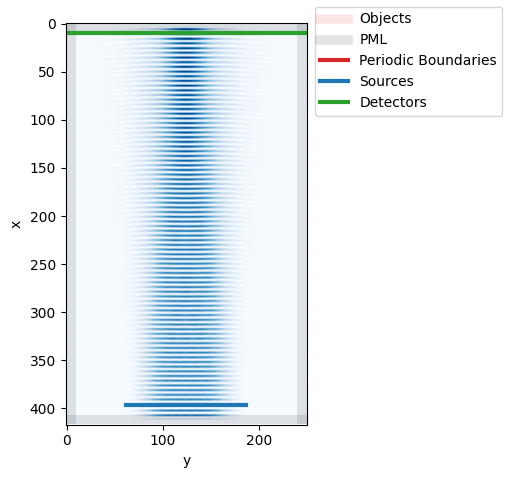

In [ ]:
# Lo mismo pero sin el aire turbulento
longitud_onda = 780e-9 # metros -> el spacing debe ser 10 veces menor que la longitud de onda para tener estabilidad

grid2 = fdtd.Grid(
    shape = (25e-6, 15e-6, 1), # 25um x 15um x 1  Dando el último valor como uno se crea una grid de dos dimensiones
    grid_spacing=longitud_onda/10
)

n1 = 1.000276
epsilon1 = n1**2

# Añadimos una fuente con perfil gaussiano
tamaño_y = grid.shape[1]*2//4
offset_y = grid.shape[1]//4

grid2[grid.shape[0]-20, offset_y:offset_y+tamaño_y, 0] = fdtd.LineSource(
    period = longitud_onda / (3e8), name="Fuente"
) # 20:80
# Añadimos un detector
grid2[10, :, 0] = fdtd.LineDetector(name="detector")

# x boundaries
grid2[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid2[-10:, :, :] = fdtd.PML(name="pml_xhigh")

# y boundaries
grid2[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid2[:, -10:, :] = fdtd.PML(name="pml_yhigh")
#grid2.visualize(z=0)
grid2.run(total_time=600) # int para número de pasos, float para segundos
grid2.visualize(z=0)

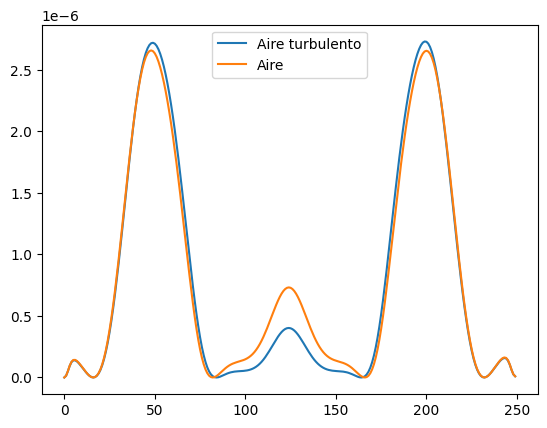

In [14]:
# En detector_values tenemos los valores detectados por el detector
index = -1
detector_E1 = grid.detector.detector_values()["E"][index]

magnitud_detector_E1 = np.einsum("ji,ji->j", detector_E1, detector_E1) # Cada \vec E en cada posición al cuadrado

detector_E2 = grid2.detector.detector_values()["E"][index]

magnitud_detector_E2 = np.einsum("ji,ji->j", detector_E2, detector_E2) # Cada \vec E en cada posición al cuadrado

plt.plot(magnitud_detector_E1, label="Aire turbulento")
plt.plot(magnitud_detector_E2, label="Aire")
plt.legend()
plt.show()

En vez de tomar lo detectado al final de simulación, es posible hacer un promedio temporal. 

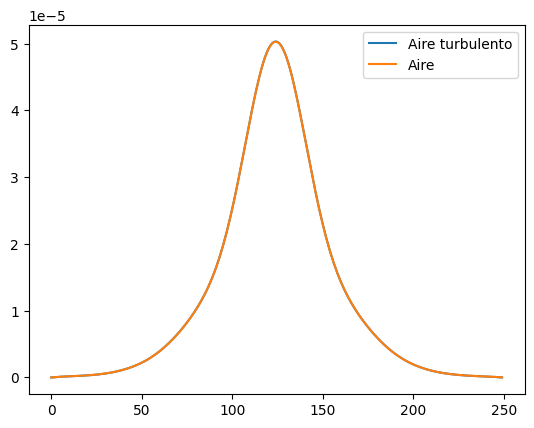

In [15]:
index = -20
detector_E1_list = grid.detector.detector_values()["E"][index:]

step = [np.einsum("ji,ji->j", detector_E1, detector_E1) for detector_E1 in detector_E1_list] # Cada \vec E en cada posición al cuadrado

magnitud_detector_E1 = np.zeros_like(step[0])

for s in step:
    magnitud_detector_E1 = s + magnitud_detector_E1
    
magnitud_detector_E1 = magnitud_detector_E1/abs(index)
magnitud_detector_E1

detector_E2_list = grid2.detector.detector_values()["E"][index:]

step = [np.einsum("ji,ji->j", detector_E2, detector_E2) for detector_E2 in detector_E2_list] # Cada \vec E en cada posición al cuadrado

magnitud_detector_E2 = np.zeros_like(step[0])

for s in step:
    magnitud_detector_E2 = s + magnitud_detector_E2
    
magnitud_detector_E2 = magnitud_detector_E2/abs(index)
magnitud_detector_E2

plt.plot(magnitud_detector_E1, label="Aire turbulento")
plt.plot(magnitud_detector_E2, label="Aire")
plt.legend()
plt.show()

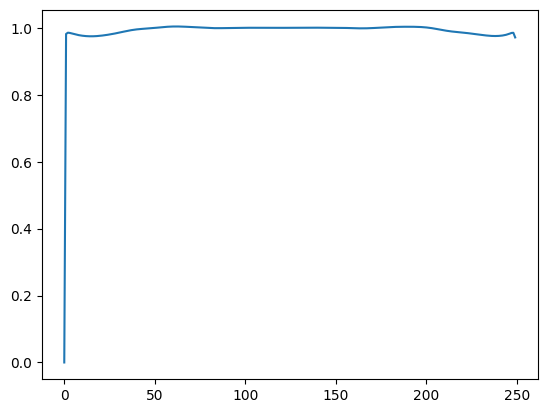

In [16]:
# Dividiendo las dos cantidades, es posible abstraer las unidades del problema
plt.plot(magnitud_detector_E1/(magnitud_detector_E2 + 1e-10))
plt.show()

No es posible ver ninguna diferencia. Para hacer la simulación más precisa es necesáreo ajustar mejor la distribución de $\epsilon$. De acuerdo con ciddor, el indice de refracción será una función de la longitud de onda, la temperatura, la presión, la humedad fraccional y la concentración de CO2. En este trabajo, la longitud de onda se mantendrá en el infrarrojo (780 nm a 1 mm). En la mayoría de los casos será posible aplicar una función de estado, como por ejemplo la ley de gases ideales, que relacione la temperatura y la presión para reducir las variables del problema. 

Considerese una franja de aire turbulento donde el principal efecto causante de la turbulencia es la temperatura. Suponiendo una turbulencia isotrópica (alto número de Reynols), las variables de estado podrán modelarse adecuadamente por campos aleatorios. Furthermore, es razonable suponer inicialmente que estos campos vienen determinados por una distribución gausiana. De esta manera, teniendo el campo relevante T es posible utilizar las ecuaciones de ciddor junto con la ecuación de estado de los gases ideales para encontrar el coeficiente de refración y con el $\epsilon$.

Este caso particular es relevante a la hora de analizar penachos de aire caliente

In [1]:
import fdtd
import numpy as np
import matplotlib.pyplot as plt

from ciddor_air import n

In [21]:
# Todo en una celda
def set_up_grid(longitud_onda:float):
	# para longitud de onda: debe ser en  metros -> el spacing debe ser 10 veces menor que la longitud de onda para tener estabilidad
	grid = fdtd.Grid(
		shape = (400, 200, 1), #   Dando el último valor como uno se crea una grid de dos dimensiones
		grid_spacing=longitud_onda*0.1
	)

	# Añadimos una fuente con perfil gaussiano
	tamaño_y = grid.shape[1]*2//4
	offset_y = grid.shape[1]//4
	# tamaño_y = grid.shape[1]*1//10
	# offset_y = grid.shape[1]*4//10

	grid[grid.shape[0]-40, offset_y:offset_y+tamaño_y, 0] = fdtd.LineSource(
		period = longitud_onda / (3e8), name="Fuente", amplitude=2.
	) # 20:80
	# Añadimos un detector
	grid[20, :, 0] = fdtd.LineDetector(name="detector")

	# x boundaries
	grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
	grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

	# y boundaries
	grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
	grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")
	
	return grid

def put_patch_temperature(grid, mean_T=25, std_T=1, h=0.2):
	"""
	Pon un patch en la grid. Versión que genera uno donde la temperatura es un campo aleatorio basado en una gausiana
	"""
	# Tamaño en x: fracción del dominio
	tamaño_x = grid.shape[0]*2//3
	# Tamaño en y: fracción del dominio
	tamaño_y = grid.shape[1]*4//6
	# Temperaturas en grados centigrados
	T_patch = np.random.normal(mean_T, std_T, (tamaño_x, tamaño_y, 1))
	print(np.mean(T_patch), np.std(T_patch))
	# https://en.wikipedia.org/wiki/Gas_constant#Specific_gas_constant
	R_esp = 287.052874 # Constante de gas ideal específica del aire J⋅kg−1⋅K−1
	rho_aire = 1.225 # kg/m3
	patch = n(longitud_onda*1e6, T_patch, rho_aire*R_esp*(273 + T_patch), h, 350)**2 # Recuerda que longitud de onda es en micrometros
	print(np.mean(patch), np.std(patch))

	# Pon el patch
	offset_x = grid.shape[0]//10
	offset_y = grid.shape[1]//6
	grid[offset_x:offset_x+tamaño_x, offset_y:offset_y+tamaño_y, 0] = fdtd.Object(permittivity=patch, name="Aire turbulento")

	plt.imshow(patch)
	plt.show()

def get_average_detector_data(grid, t_index_1, t_index_2):
	"""Toma el promedio de E^2 (no el cuadrado del promedio) de lo que llega al detector de la grid.
	El promedio es lo que detecta entre los tiempos t_index_1, t_index_2. Debes dar los tiempos como indices"""
	detector_E_list = grid.detector.detector_values()["E"][t_index_1:t_index_2]

	step = [np.einsum("ji,ji->j", detector_E, detector_E) for detector_E in detector_E_list] # Cada \vec E en cada posición al cuadrado

	magnitud_detector_E = np.zeros_like(step[0])

	for s in step:
		magnitud_detector_E = s + magnitud_detector_E

	magnitud_detector_E = magnitud_detector_E/abs(t_index_2 - t_index_1)

	return magnitud_detector_E


30.037151259988388 7.0031009085458615
1.0005473854533666 2.7251840542794666e-07


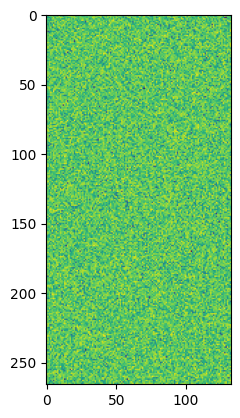

In [22]:
longitud_onda = 1000e-9 # 780e-9
grid = set_up_grid(longitud_onda)
put_patch_temperature(grid, 30, 7)

100%|██████████| 900/900 [00:07<00:00, 116.19it/s]


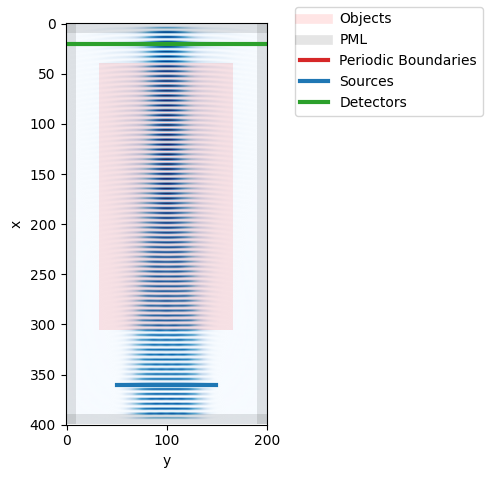

In [23]:
grid.run(total_time=900) # int para número de pasos, float para segundos
grid.visualize(z=0)

100%|██████████| 900/900 [00:07<00:00, 120.70it/s]


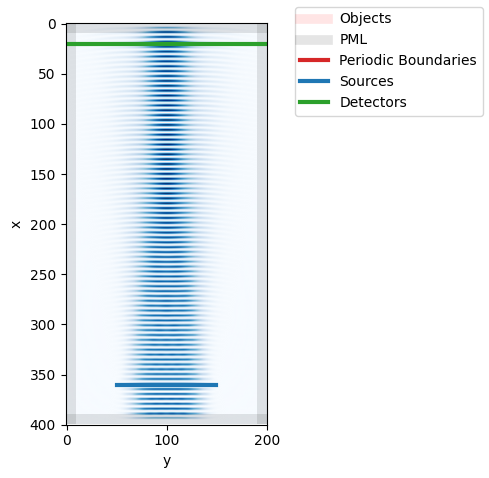

In [24]:
grid2 = set_up_grid(longitud_onda)
grid2.run(total_time=900) # int para número de pasos, float para segundos
grid2.visualize(z=0)

Las representaciones siguientes usan imshow, ten cuidado con como están escaladas para compararlas.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow

0.0006031583367705712 0.0
0.0006165892335528381 0.0


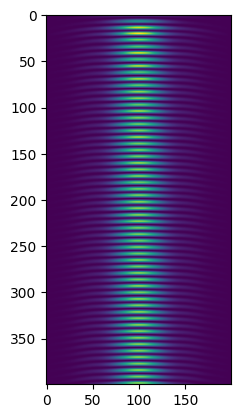

In [25]:
#Ahora en magnitud_detector_E tenemos todos los valores en el tiempo, que es el primer indice, de la magnitud al cuadrado del campo
# Optimizado y mejor si queremos representarlo
valores = grid.detector.detector_values()["E"]
valores = np.array(valores)
#valores = np.where(valores < 1e-7, 0.0, valores)
magnitud_detector_E1 = np.einsum("ijk,ijk->ij", valores, valores)

valores2 = grid2.detector.detector_values()["E"]
valores2 = np.array(valores2)
#valores2 = np.where(valores2 < 1e-7, 0.0, valores2)
magnitud_detector_E2 = np.einsum("ijk,ijk->ij", valores2, valores2)

# index = -12
# plt.plot(magnitud_detector_E1[index], label="Aire turbulento")
# plt.plot(magnitud_detector_E2[index], label="Aire")
# plt.legend()
# plt.show()

print(magnitud_detector_E1.max(), magnitud_detector_E1.min())
print(magnitud_detector_E2.max(), magnitud_detector_E2.min())

# Es mejor enseñar imágenes de lo que recive el detector en el tiempo
# La magnitud es la intensidad del campo, la x es la posición en el detector y la y es el tiempo
# Representamos solo desde el tiempo 500
plt.imshow(magnitud_detector_E1[500:]) # Si lo prefieres puedes invertir añadiendo [::-1]
#plt.imshow(np.log(1+magnitud_detector_E2[500:]))
plt.show()

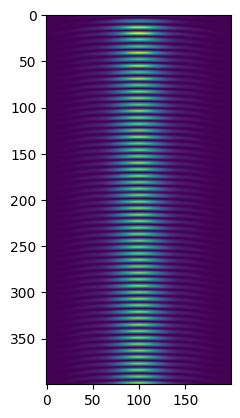

In [26]:
plt.imshow(magnitud_detector_E2[500:]) # Si lo prefieres puedes invertir añadiendo [::-1]
plt.show()

3.3526059396730404e-05 0.0


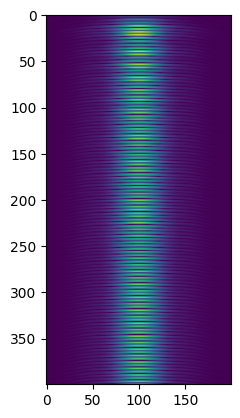

In [27]:
s = abs(magnitud_detector_E2[500:] - magnitud_detector_E1[500:])
print(s.max(), s.min())
plt.imshow(s)
plt.show()

C:\Users\villa\AppData\Local\Temp\ipykernel_6512\2425513212.py:4: RuntimeWarning: invalid value encountered in divide
  s = np.nan_to_num(m1/m2, nan=0.0)
C:\Users\villa\AppData\Local\Temp\ipykernel_6512\2425513212.py:7: RuntimeWarning: divide by zero encountered in divide
  s = np.divide(np.round(m1, dec), np.round(m2, dec), where=m2 != 0)
C:\Users\villa\AppData\Local\Temp\ipykernel_6512\2425513212.py:7: RuntimeWarning: invalid value encountered in divide
  s = np.divide(np.round(m1, dec), np.round(m2, dec), where=m2 != 0)


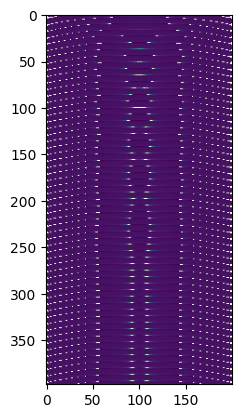

In [28]:
m1 = magnitud_detector_E1[500:][1:-1]
m2 = magnitud_detector_E2[500:][1:-1]
#s = np.where(m2 < 1e-6, 0.0, m1/m2)
s = np.nan_to_num(m1/m2, nan=0.0)
#plt.imshow(m1/m2)
dec = 7
s = np.divide(np.round(m1, dec), np.round(m2, dec), where=m2 != 0)
plt.imshow(s)
plt.show()

C:\Users\villa\AppData\Local\Temp\ipykernel_6512\1701015068.py:6: RuntimeWarning: invalid value encountered in divide
  r = np.where(np.abs(m2) > 1e-8, m1/m2, 0.0)


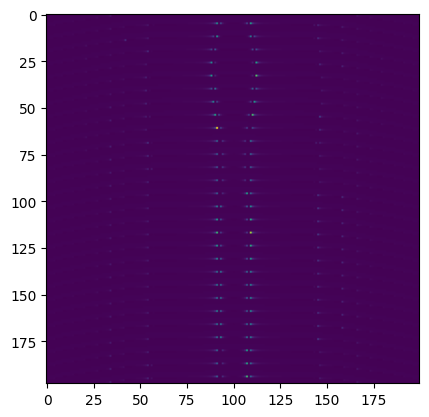

In [29]:
m1 = magnitud_detector_E1[700:][1:-1]
m2 = magnitud_detector_E2[700:][1:-1]

m1 = np.where(np.abs(m1) > 1e-8, m1, 0.0)

r = np.where(np.abs(m2) > 1e-8, m1/m2, 0.0)

plt.imshow(r)
plt.show()

In [11]:
np.savetxt("temp.txt", r)

In [12]:
m1[37, 100]

np.float64(0.0)

In [13]:
m2[37, 100]

np.float64(1.9384668195856938e-19)

In [14]:
m1[37, 100]/m2[37, 100]

np.float64(0.0)

In [15]:
r[37]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

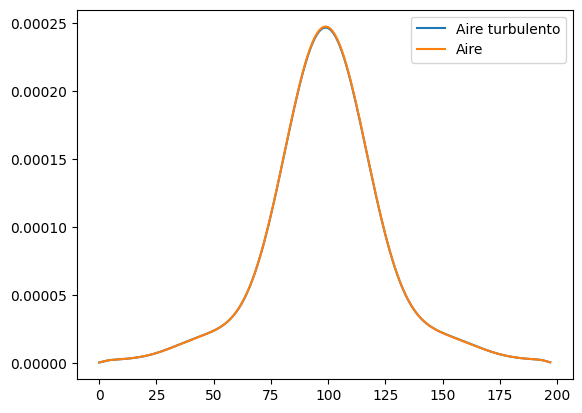

In [30]:
# Como las condiciones de contorno son PMLs, en los bordes del detector (que están dentro de los mismos) siempre tendremos ceros
# Por eso quitamos esos bordes
# para que los valores promedios tengan sentido deben incluir varias longitudes de onda. 
# Como se puede ver en las imagenes de más arriba, los indices deben de tomar 40 o 60 puntos
# 60 puntos finales
inital = -60
final = -2

magnitud_detector_E1 = get_average_detector_data(grid, inital, final)[1:-1]
magnitud_detector_E2 = get_average_detector_data(grid2, inital, final)[1:-1]

plt.plot(magnitud_detector_E1, label="Aire turbulento")
plt.plot(magnitud_detector_E2, label="Aire")
plt.legend()
plt.show()

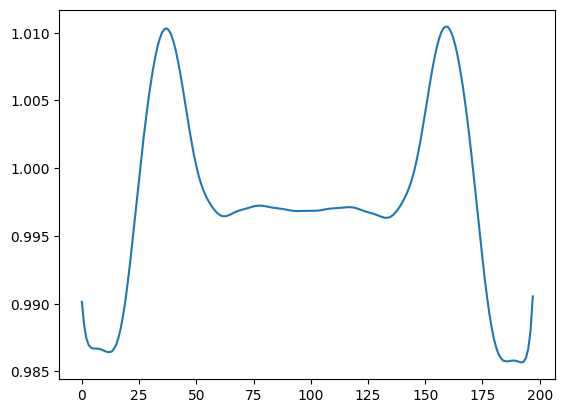

In [31]:
# Dividiendo las dos cantidades, es posible abstraer las unidades del problema
plt.plot(magnitud_detector_E1/magnitud_detector_E2)
plt.show()

In [32]:
print(magnitud_detector_E1[30:40]/magnitud_detector_E2[30:40])

[1.00615863 1.00723729 1.00815267 1.0089454  1.0095525  1.01000466
 1.010248   1.01031924 1.01017648 1.00985816]


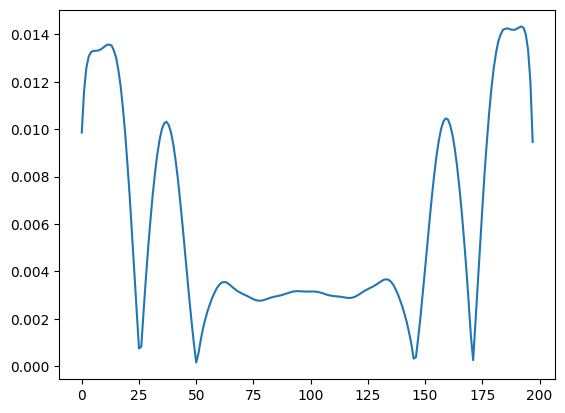

In [33]:
plt.plot(abs(magnitud_detector_E1 - magnitud_detector_E2)/magnitud_detector_E2)
plt.show()

El ratio de ambos campos según cambian los parámetros.

29.99496634513326 7.007564077867766
1.000545057407172 2.729213914045909e-07


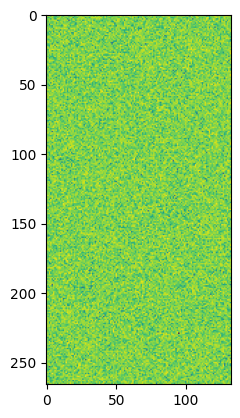

100%|██████████| 900/900 [00:07<00:00, 118.79it/s]


In [34]:
longitud_onda = 2000e-9

tiempo_total = 900

grid = set_up_grid(longitud_onda)
put_patch_temperature(grid, 30, 7)

grid.run(total_time=tiempo_total)

grid2 = set_up_grid(longitud_onda)
grid2.run(total_time=tiempo_total) 

C:\Users\villa\AppData\Local\Temp\ipykernel_6512\2650921728.py:14: RuntimeWarning: invalid value encountered in divide
  r = np.where(np.abs(m2) > 1e-8, m1/m2, 0.0)


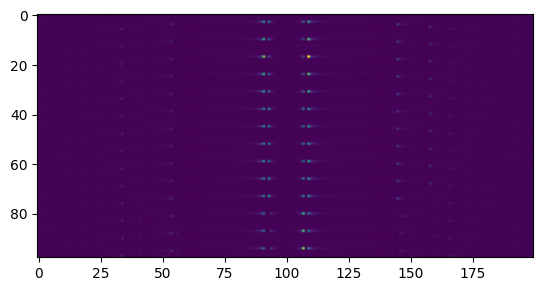

In [38]:
valores = grid.detector.detector_values()["E"]
valores = np.array(valores)
magnitud_detector_E1 = np.einsum("ijk,ijk->ij", valores, valores)

valores2 = grid2.detector.detector_values()["E"]
valores2 = np.array(valores2)
magnitud_detector_E2 = np.einsum("ijk,ijk->ij", valores2, valores2)

m1 = magnitud_detector_E1[800:][1:-1]
m2 = magnitud_detector_E2[800:][1:-1]

m1 = np.where(np.abs(m1) > 1e-8, m1, 0.0)

r = np.where(np.abs(m2) > 1e-8, m1/m2, 0.0)

plt.imshow(r)
plt.show()

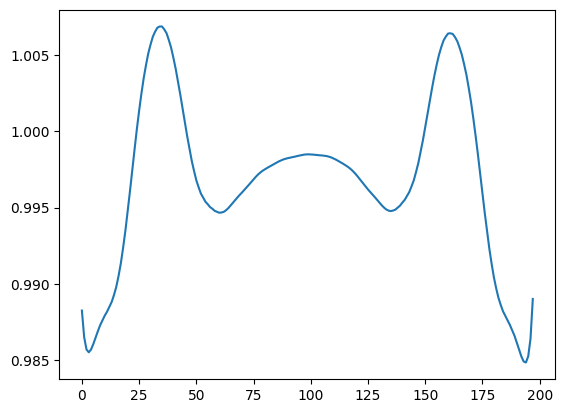

In [39]:
inital = -60
final = -20

magnitud_detector_E1 = get_average_detector_data(grid, inital, final)[1:-1]
magnitud_detector_E2 = get_average_detector_data(grid2, inital, final)[1:-1]

# Dividiendo las dos cantidades, es posible abstraer las unidades del problema
# Se puede esperar que el ratio sea siempre menor o igual a uno, ya que los pequeños cambios del indice deben disipar algo de energía
plt.plot(magnitud_detector_E1/magnitud_detector_E2)
plt.show()

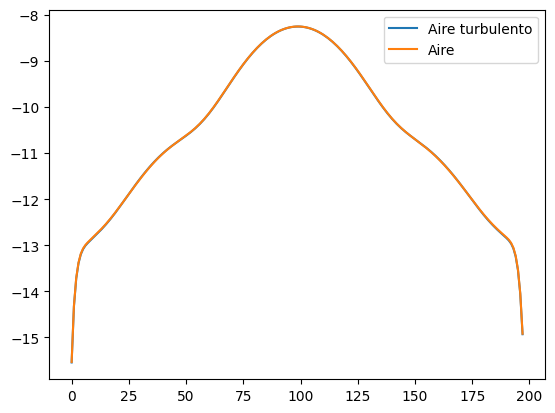

In [42]:
# plt.plot(magnitud_detector_E1, label="Aire turbulento")
# plt.plot(magnitud_detector_E2, label="Aire")
log_d1 = np.log(magnitud_detector_E1)
log_d2 = np.log(magnitud_detector_E2)
plt.plot(log_d1, label="Aire turbulento")
plt.plot(log_d2, label="Aire")
# plt.ylim((1.0e-4, 1.3e-4))
# plt.xlim((100, 200))
plt.legend()
plt.show()

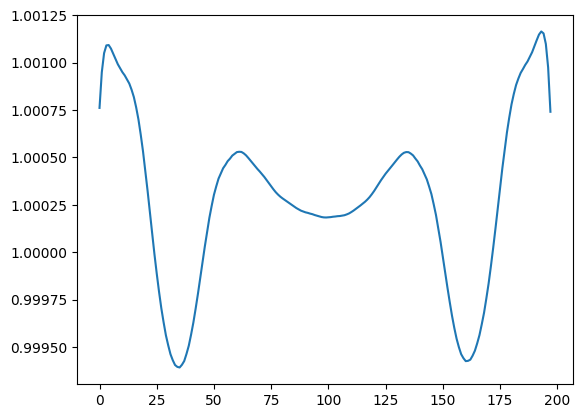

In [43]:
plt.plot(log_d1/log_d2)
plt.show()